In [22]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Sci-kit Learn Libraries for Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
# Importing Metrics for Regression Model
from sklearn.metrics import mean_squared_error,r2_score


In [23]:
# Importing dataset
df = pd.read_csv('Mumbai+House+Prices.csv')
df.sample(frac = 1)

,bhk,type,locality,area,price,price_unit,region,status,age
65045,5,Apartment,Hiranandani Estate,5868,8.00,Cr,Thane West,Ready to move,Unknown
40019,3,Villa,Balaji Moti Green Park,2500,1.51,Cr,Virar,Under Construction,New
17600,4,Apartment,Indiabulls Daffodils,2100,1.65,Cr,Panvel,Ready to move,New
41713,3,Apartment,Chandak 34 Park Estate,846,2.28,Cr,Goregaon West,Under Construction,New
45199,2,Apartment,Siddha Seabrook Apartment,890,1.31,Cr,Kandivali West,Under Construction,New
...,...,...,...,...,...,...,...,...,...
49884,3,Apartment,Haware Haware Citi,1105,79.50,L,Thane West,Ready to move,Resale
31139,1,Studio Apartment,Seven Eleven Apna Ghar Phase II Plot A,227,40.00,L,Mira Road East,Ready to move,New
30618,2,Apartment,L And T 77 Crossroads,739,1.27,Cr,Ghatkopar East,Under Construction,New
30616,2,Apartment,Buildman Harmony,1060,87.50,L,Bhayandar East,Ready to move,Resale


In [24]:
# Normalize House Prices
df['price_lakhs'] = df.apply(lambda row:row['price']*100 if row['price_unit'] == 'Cr' else row['price'],axis = 1)

In [25]:
df.drop(columns=['price','price_unit','locality'],inplace = True)

In [26]:
# checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bhk          76038 non-null  int64  
 1   type         76038 non-null  object 
 2   area         76038 non-null  int64  
 3   region       76038 non-null  object 
 4   status       76038 non-null  object 
 5   age          76038 non-null  object 
 6   price_lakhs  76038 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.1+ MB


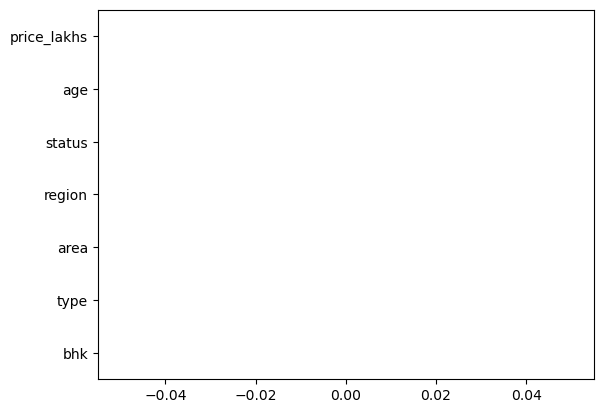

In [27]:
# Checking Null Values Stats using Graphical Method 
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [28]:
# Segregate Categorical and Numerical Columns
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [29]:
df

,bhk,type,area,region,status,age,price_lakhs
0,3,Apartment,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,876,Panvel,Under Construction,New,59.98
4,2,Apartment,659,Mira Road East,Under Construction,New,94.11
...,...,...,...,...,...,...,...
76033,3,Apartment,1527,Juhu,Ready to move,Unknown,700.00
76034,5,Apartment,3049,Juhu,Ready to move,Unknown,1200.00
76035,4,Apartment,3313,Napeansea Road,Ready to move,Unknown,1000.00
76036,2,Apartment,1305,Bandra East,Ready to move,Unknown,425.00


In [30]:
categorical_col 

,type,region,status,age
0,Apartment,Andheri West,Ready to move,New
1,Apartment,Naigaon East,Under Construction,New
2,Apartment,Borivali West,Under Construction,New
3,Apartment,Panvel,Under Construction,New
4,Apartment,Mira Road East,Under Construction,New
...,...,...,...,...
76033,Apartment,Juhu,Ready to move,Unknown
76034,Apartment,Juhu,Ready to move,Unknown
76035,Apartment,Napeansea Road,Ready to move,Unknown
76036,Apartment,Bandra East,Ready to move,Unknown


In [31]:
numerical_col

,bhk,area,price_lakhs
0,3,685,250.00
1,2,640,52.51
2,2,610,173.00
3,2,876,59.98
4,2,659,94.11
...,...,...,...
76033,3,1527,700.00
76034,5,3049,1200.00
76035,4,3313,1000.00
76036,2,1305,425.00


In [32]:
# Explorartory Data Analysis 
# Univariate Analysis
'''
step 1: Create Blank list : stats[]
step 2: Using OrderedDict create dictionary
step 3: Append List :stats[]
step 4: convert appended list into Dataframe
'''
from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count':df[i].count(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Maximum':df[i].max(),
        'Minimum':df[i].min(),
        'Standard Deviation':df[i].std(),
        'Kurtosis':df[i].kurt(),
        'Skewness':df[i].skew()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Q1,Q3,IQR,Maximum,Minimum,Standard Deviation,Kurtosis,Skewness
0,bhk,76038,2.015111,2.0,1.0,3.0,2.0,10.0,1.00,0.922754,1.415944,0.896300
1,area,76038,1024.536850,872.0,640.0,1179.0,539.0,16000.0,127.00,670.276165,32.260298,3.935766
2,price_lakhs,76038,168.417795,110.0,64.0,194.0,130.0,6000.0,4.49,217.665511,99.622588,7.273683


In [33]:

# Use Label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])

In [34]:
'''
step 1: Split the dataset into X and y 
step 2: Split the dataset into train and test
step 3: Try Balancing method for target column
step 4: Scaling Technique
step 5: Model Building
'''

# Step 1
X = df.drop(columns = 'price_lakhs',axis = 1)
y = df['price_lakhs']

# Step 2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

# step 3
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_train)
model.predict(X_test)


array([ 66.93351281, 363.16086797, 118.11563581, ..., 251.70520806,
       146.47619487,  43.5570704 ])

In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse:.2f}")
print(f"R2 Score:{r2:.2f}")

Mean Squared Error:18820.59
R2 Score:0.60
